# MDI341: TP Graphs

**Note**: Ce notebook a été conçu pour fonctionner avec
- Python 3 et NetworkX 2.4
- Python 2 et NetworkX 2.2

In [3]:
!pip install --upgrade networkx

     |████████████████████████████████| 1.6 MB 3.4 MB/s eta 0:00:01     |███████████████████▊            | 993 kB 3.4 MB/s eta 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3


In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile

In [2]:
print("Version de NetworkX: ", nx.__version__)

Version de NetworkX:  2.4


**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Graphes aléatoires - Erdős-Rényi

#### Question 1

On commence par créer et visualiser un graphe de type Erdős-Rényi avec n=200 noeuds et p=0.04. Vous aurez besoin des fonctions `nx.erdos_renyi_graph` et `nx.draw`.

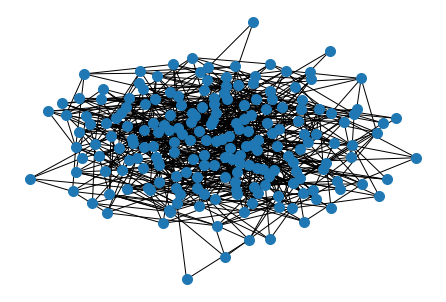

In [15]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n, p, seed=42)
nx.draw(G_erdos, with_labels=False, font_weight='bold', node_size=100)

#### Question 2

Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés.

In [33]:
degree_sequence_erdos = list(dict(G_erdos.degree).values())
print("Nombre d'arêtes = %d" %G_erdos.number_of_edges())
print("Nombre de noeuds = %d" %G_erdos.number_of_nodes())
print("Degré minimum = %d" %min(degree_sequence_erdos))
print("Degré maximum = %d" %max(degree_sequence_erdos))
print("Degré médian = %.2f" %np.median(degree_sequence_erdos))
print("Degré moyen = %.2f" %np.mean(degree_sequence_erdos))
print("Degré moyen en espérance = %.2f" %(n*p))

Nombre d'arêtes = 742
Nombre de noeuds = 200
Degré minimum = 2
Degré maximum = 15
Degré médian = 7.00
Degré moyen = 7.42
Degré moyen en espérance = 8.00


> On peut donc en conclure que **le degré moyen observé est très proche de sa valeur en espérance $n \times p$**. La différence est due à la variance (on ne calcule le degré moyen que sur une réalisation : un graphe de relativement petite taille). Afin de se rapprocher de la valeur théorique, il faudrait moyenner sur plusieurs graphes indépendamment selon le même modèle.

#### Question 3

On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction `nx.degree_histogram` vous sera utile.

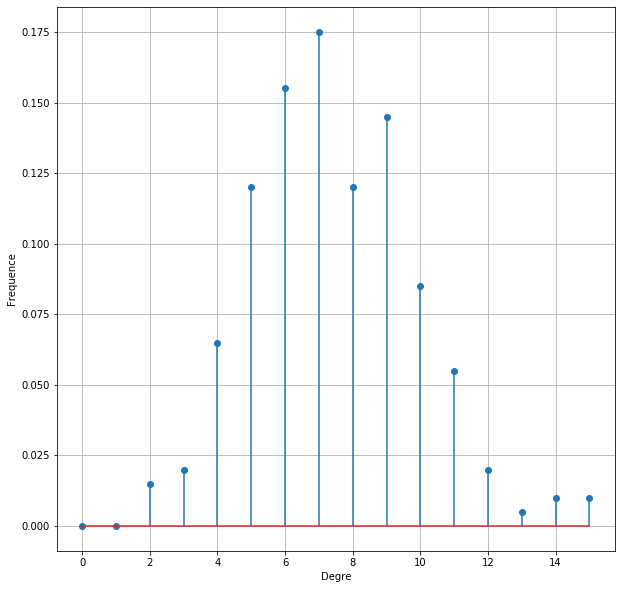

In [22]:
degree_freq = np.array(nx.degree_histogram(G_erdos)) * 1./n
y = degree_freq

plt.figure(figsize=(10, 10))
plt.stem(y, use_line_collection=True)
plt.ylabel("Frequence");
plt.xlabel("Degre");
plt.grid(True)

> On obtient donc bien un aspect correspondant à une loi binomiale centrée autour de la moyenne.

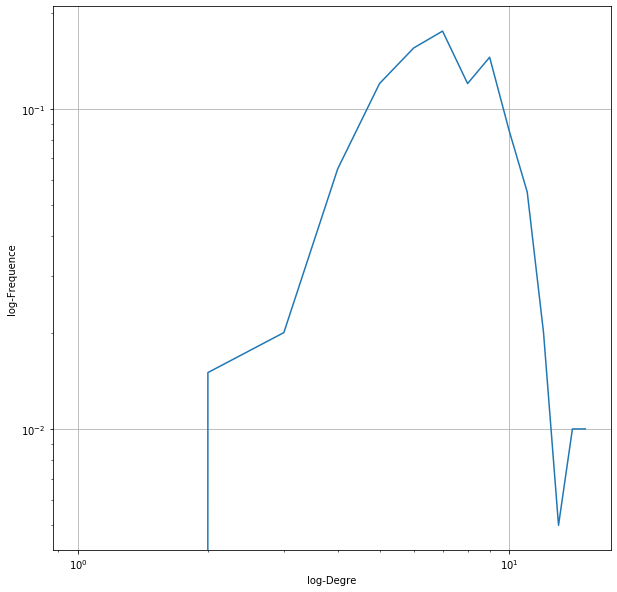

In [23]:
plt.figure(figsize=(10, 10))
plt.loglog(y)
plt.ylabel("log-Frequence");
plt.xlabel("log-Degre");
plt.grid(True)

> Le graphe ne ressemble ici pas du tout à une ligne droite (ce qui indiquerait une distribution des degrés selon une loi de puissance), donc pas d'attachement préférentiel.

#### Question 4

On calcule maintenant le coefficient de clustering global (voir `nx.clustering`)

In [30]:
clust_coeff_local_erdos = list(nx.clustering(G_erdos).values())

print("Coefficient de clustering global : %f" %np.mean(clust_coeff_local_erdos))
print("Rappel de la valeur de p : %.2f" %p)

Coefficient de clustering global : 0.038884
Rappel de la valeur de p : 0.04


> La valeur empirique est donc très proche de la valeur en espérance.

#### Question 5

Peut-on parler d’effet "petit monde" pour ce graphe ? 
> On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe.

In [31]:
print("Longueur moyenne des plus courts chemins : %.2f" %nx.average_shortest_path_length(G_erdos))
print("Diamètre du graphe : %d" %nx.diameter(G_erdos))

Longueur moyenne des plus courts chemins : 2.84
Diamètre du graphe : 5


> On peut donc clairement parler d'effet "petit monde" pour ce graphe. Cela est dû à l'aspect purement aléatoire des arrêtes.

### Barabási–Albert

#### Question 6

On crée et visualise maintenant un graphe de Barabási–Albert avec n=200 noeuds (on ajoute à chaque fois m=3 arêtes), puis on applique la même analyse que celle faite pour Erdős-Rényi

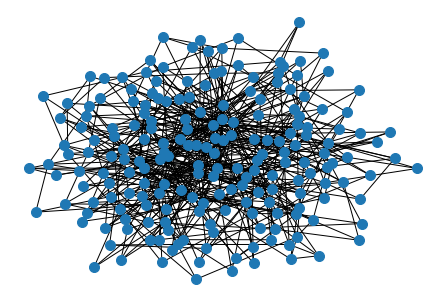

In [32]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n, m, seed=42)
nx.draw(G_barabasi, with_labels=False, font_weight='bold', node_size=100)

In [36]:
degree_sequence_barabasi = list(dict(G_barabasi.degree).values())
print("Nombre d'arêtes = %d" %G_barabasi.number_of_edges())
print("Nombre de noeuds = %d" %G_barabasi.number_of_nodes())
print("Degré minimum = %d" %min(degree_sequence_barabasi))
print("Degré maximum = %d" %max(degree_sequence_barabasi))
print("Degré médian = %.2f" %np.median(degree_sequence_barabasi))
print("Degré moyen = %.2f" %np.mean(degree_sequence_barabasi))

Nombre d'arêtes = 591
Nombre de noeuds = 200
Degré minimum = 3
Degré maximum = 43
Degré médian = 4.00
Degré moyen = 5.91


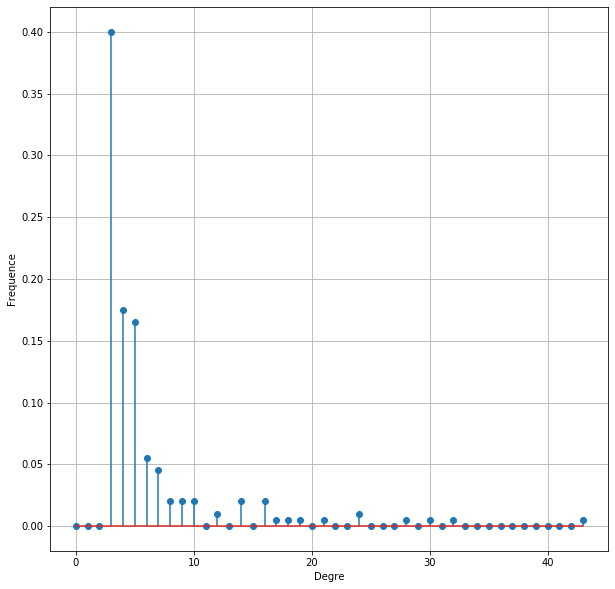

In [38]:
degree_freq2 = np.array(nx.degree_histogram(G_barabasi)) * 1./n
y = degree_freq2

plt.figure(figsize=(10, 10))
plt.stem(y, use_line_collection=True)
plt.ylabel("Frequence");
plt.xlabel("Degre");
plt.grid(True)

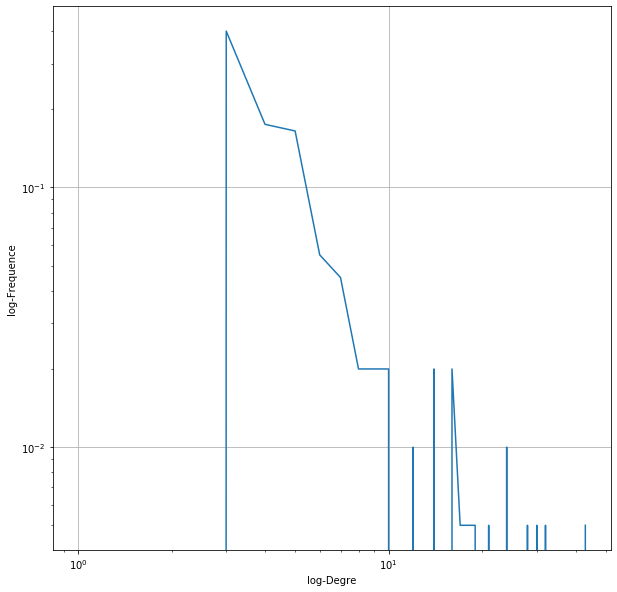

In [39]:
plt.figure(figsize=(10, 10))
plt.loglog(y)
plt.ylabel("log-Frequence");
plt.xlabel("log-Degre");
plt.grid(True)

> On a cette fois bien une distribution des degrés en loi de puissance et donc un attachement préférentiel.

In [41]:
clust_coeff_local_barabasi = list(nx.clustering(G_barabasi).values())

print("Coefficient de clustering global : %f" %np.mean(clust_coeff_local_barabasi))

Coefficient de clustering global : 0.112847


In [42]:
print("Longueur moyenne des plus courts chemins: %.2f" % nx.average_shortest_path_length(G_barabasi))
print("Diamètre du graphe: %d" % nx.diameter(G_barabasi))

Longueur moyenne des plus courts chemins: 2.87
Diamètre du graphe: 5


> On a également ici un effet "petit monde" qui est cette fois dû à l'attachement préférentiel => quelques nœuds très connectés qui permettent de passer rapidement d'une partie à l'autre du graphe.

## Graphe Karate Club

On va maintenant travailler sur un graphe réel de petite taille (n=34, m=78) qui représente les liens d'amitié entre les adhérents d'un club de karaté (le graphe est intégré à la librairie `networkx`)

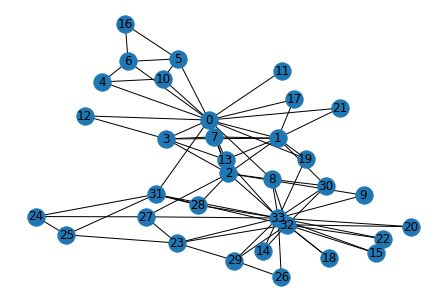

In [45]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, with_labels=True, pos=pos)

#### Question 7

On va appliquer un clustering hiérarchique pour faire de la détection de communauté. On calcule d'abord la matrice des distances entre noeuds, où la distance entre 2 noeuds correspond à la longueur du plus court chemin

In [46]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs = dict(nx.all_pairs_shortest_path_length(G_karate))
distances = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

On peut maintenant utiliser l'implémentation de clustering hiérarchique ascendant de `scikit-learn` avec le *lien moyen* comme mesure de dissimilarité entre clusters. On affiche tout d'abord le clustering à 4 clusters, puis à 2 clusters.

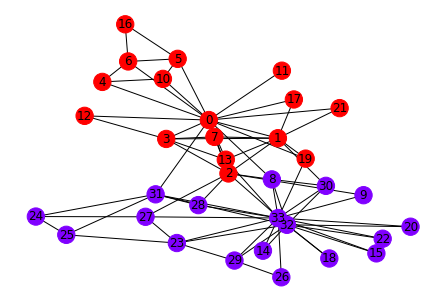

In [50]:
from sklearn.cluster import AgglomerativeClustering

# TODO QUESTION 7
hier_clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
values = hier_clustering.fit_predict(distances)
nx.draw(G_karate, cmap=plt.get_cmap('rainbow'), pos=pos, node_color=values, 
        node_size=300, with_labels=True)

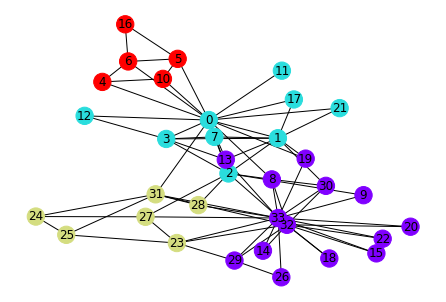

In [49]:
# SOLUTION A 4 CLUSTERS
hier_clustering = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
values = hier_clustering.fit_predict(distances)
nx.draw(G_karate, cmap=plt.get_cmap('rainbow'), pos=pos, node_color=values, 
        node_size=300, with_labels=True)

> On pourrait considérer que la solution à 2 communautés est la bonne car dans la vraie vie ces deux communautés se sont séparées sur un désaccord et ont chacune créé leur propre club! (voir [ici](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) pour les curieux)

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

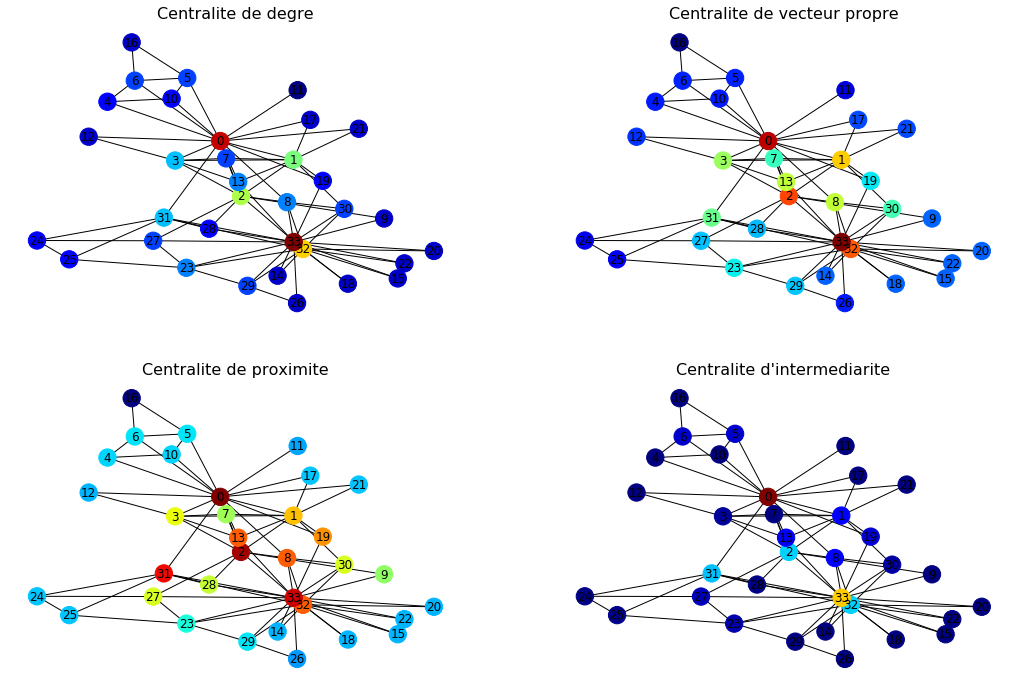

In [51]:
c_degree = list(nx.degree_centrality(G_karate).values())
c_eigenvector = list(nx.eigenvector_centrality(G_karate).values())
c_closeness = list(nx. closeness_centrality(G_karate).values())
c_betweenness = list(nx.betweenness_centrality(G_karate).values())

plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Centralite de degre', size=16);

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Centralite de vecteur propre', size=16);

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Centralite de proximite', size=16);

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Centralite d\'intermediarite', size=16);

> L'échelle va du bleu foncé (peu central) au rouge foncé (très central). Ces résultats montrent donc bien la différence entre les critères de centralité. On voit néanmoins que les nœuds `0` et `33` sont centraux pour tous les critères. Il s'agit en fait du président du club et de l'entraîneur, qui sont également à l'origine de la séparation.

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

On va maintenant étudier un graphe de grande taille dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble (plus de détails [ici](https://snap.stanford.edu/data/com-Amazon.html))

In [4]:
# if os.path.exists('amazon.txt.gz') is False:
#      resp = urllib.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
#                                'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

In [5]:
n = G_amazon.number_of_nodes()
m = G_amazon.number_of_edges()
print("Nombre de noeuds: " + str(n))
print("Nombre d'aretes: " + str(m))
print("Nombre de composantes connexes: " + str(nx.number_connected_components(G_amazon)))

Nombre de noeuds: 334863
Nombre d'aretes: 925872
Nombre de composantes connexes: 1


In [9]:
degree_sequence_amazon = list(dict(G_amazon.degree()).values())
print("Degré minimum = " + str(min(degree_sequence_amazon)))
print("Degré maximum = " + str(max(degree_sequence_amazon)))
print("Degré médian = " + str(np.median(degree_sequence_amazon)))
print("Degré moyen = " + str(np.mean(degree_sequence_amazon)))

Degré minimum = 1
Degré maximum = 549
Degré médian = 4.0
Degré moyen = 5.529855493141971


> On peut donc supposer avoir une distribution des degrés en loi de puissance.

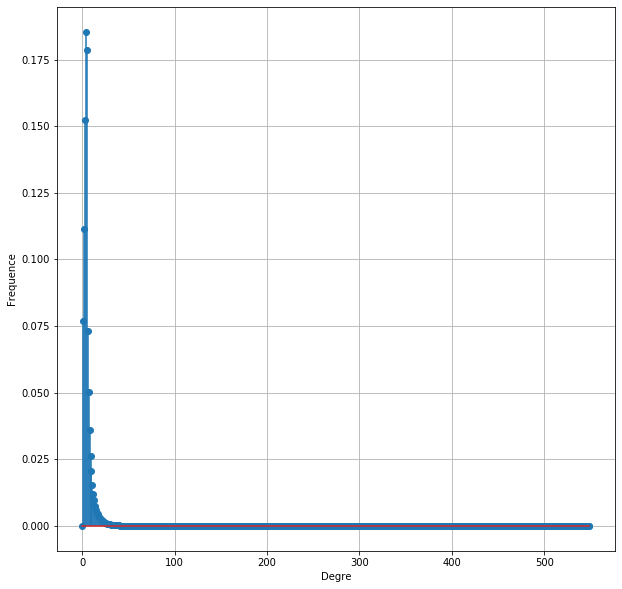

In [16]:
degree_freq3 = np.array(nx.degree_histogram(G_amazon)) * 1./n
y = degree_freq3

plt.figure(figsize=(10, 10))
plt.stem(y, use_line_collection=True)
plt.ylabel("Frequence");
plt.xlabel("Degre");
plt.grid(True)

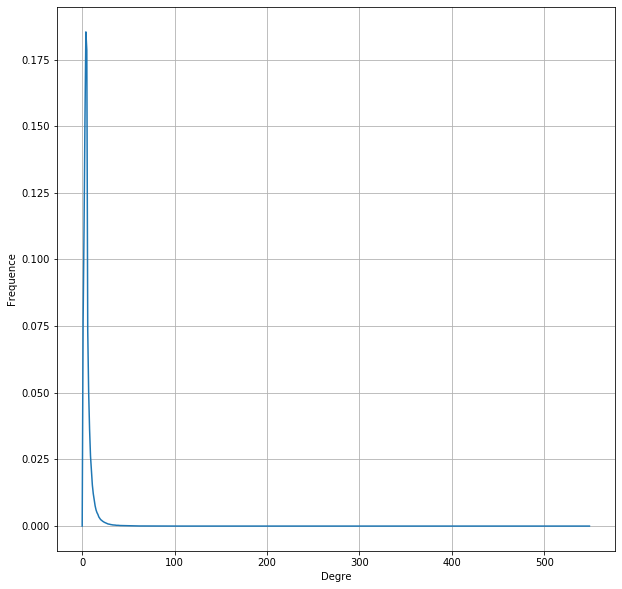

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(y)
plt.ylabel("Frequence");
plt.xlabel("Degre");
plt.grid(True)

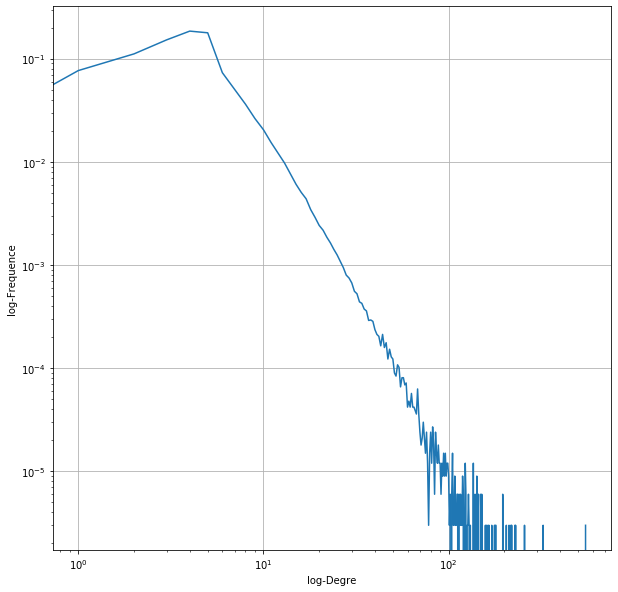

In [19]:
plt.figure(figsize=(10, 10))
plt.loglog(y)
plt.ylabel("log-Frequence");
plt.xlabel("log-Degre");
plt.grid(True)

> On a donc bien une loi de puissance quasiment parfaite. L'interpréttion peut se faire comme suit : la plupart des produits sont achetés avec un faible nombre d'autres produits, mais un nombre non négligeables de produits entraînent l'achat potentiel de nombreux autres.

In [20]:
clust_coeff_local_amazon = np.array(list(nx.clustering(G_amazon).values()))
print("Coefficient de clustering global: " + str(np.mean(clust_coeff_local_amazon)))

Coefficient de clustering global: 0.3967463932788733


Text(0.5, 0, 'log-Degre')

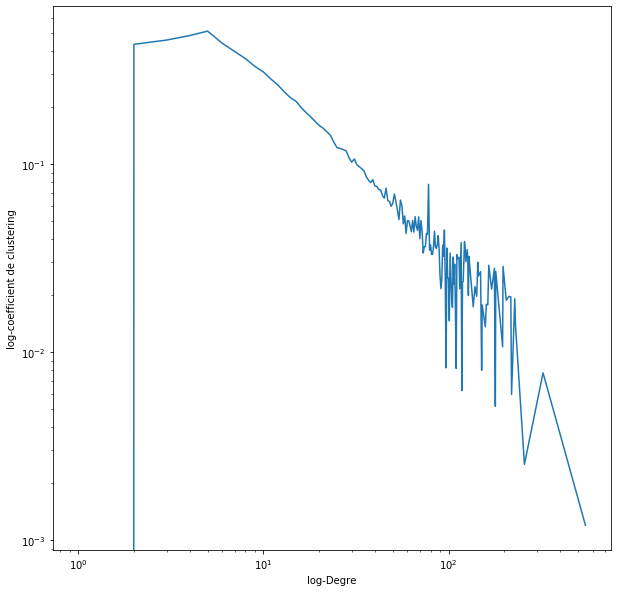

In [22]:
degree_sequence_amazon = np.array(list(degree_sequence_amazon))
clust_coeff_k_amazon = np.zeros(np.unique(degree_sequence_amazon).shape)

for i, d in enumerate(np.unique(degree_sequence_amazon)):
    clust_coeff_k_amazon[i] = clust_coeff_local_amazon[degree_sequence_amazon == d].mean()

plt.figure(figsize=(10, 10))
plt.loglog(np.unique(degree_sequence_amazon), clust_coeff_k_amazon)
plt.ylabel("log-coefficient de clustering")
plt.xlabel("log-Degre")

> Le coefficient de clustering est très élevé, et on observe bien une loi de puissance sur la distribution des coefficients de clustering par degré. Il y a donc une structure hiérarchique claire qui indique qque certains produits font le "pont" entre différentes communautés (catégories) de produits. Ce sont sans doute les produits à valoriser car ils peuvent entraîner des achats combinés de différents types (**par exemple ce sont potentiellement de bons produits d'appel**).

## Prédiction dans les graphes

Un *ego-network* est un sous-graphe d'un réseau social centré sur un utilisateur. Ici on va travailler avec un ego-network Facebook (téléchargeable [ici](https://snap.stanford.edu/data/egonets-Facebook.html)) qui représente les amis d'un utilisateur donné (sans ce dernier) et les liens d'amitié entre eux. Le jeu de données contient 10 ego-networks, on va travailler avec l'un d'entre eux seulement qui se prête bien à la visualisation.

In [ ]:
# if os.path.exists('facebook.tar.gz') is False:
#     resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
#                               'facebook.tar.gz')
tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb, k=.2, seed=3)
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

On va maintenant essayer de prédire des liens dans le réseau. Pour cela, on commence par extraire une proportion des arêtes du graphe, dont on cherchera à prédire l'existence parmi toutes les arêtes non-existantes possibles. Le graphe d'apprentissage est le graphe original auquel on retire les arêtes sélectionnées.

In [ ]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

random.seed(5)
proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

In [ ]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

#### Question 11

On va maintenant faire de la classification semi-supervisée des noeuds. Pour cela on va utiliser les attributs qui sont fournis avec l'ego-network. Ces attributs représentent des caractéristiques (anonymisées) des utilisateurs du réseau. Dans la suite nous allons utiliser l'attribut `43` qui vaut `+1` (rouge) si la personne a étudié dans une école donnée, et `-1` (bleu) sinon.

In [ ]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))
        
features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On voit que cet attribut est relativement lisse sur le graphe, il se prête donc bien à la classification par propagation de label (ce n'est pas le cas de tous les attributs!). On va donc sélectionner aléatoirement une petite proportion de noeuds pour lesquels nous aurons accès aux labels. Notre tâche sera d'utiliser ces noeuds étiquetés ainsi que la structure du graphe pour prédire le label des autres noeuds. On regarde d'abord les noeuds étiquetés.

In [ ]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On va maintenant appliquer la propagation de label et voir les résultats

In [ ]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# propagation de labels à faire ici

# labels prédits à mettre dans une variable F_pred pour affichage ci-dessous
# F_pred = 
# taux de succes a mettre dans une variable pred pour affichage ci-dessous
# pred = 

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black